In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns
import datetime as dt
import yaml
from pandas.tseries import offsets
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator, NullLocator)
import matplotlib.dates as mdates

In [98]:
csv_opts = {'sep': '|',
            'quotechar': '"',
            'compression': 'gzip',
            'encoding': 'utf-8'}

In [99]:
cow = pd.read_csv('../input/cowlitz.csv.gz', **csv_opts, parse_dates=['Admit Date'])
nor = pd.read_csv('../input/norcor.csv.gz', **csv_opts, parse_dates=['Admitted', 'Released'])

In [100]:
cow.head()

,ID,Days,Hours,Admit Date,Facility
0,Cowlitz 1,NaN,11,2015-04-21,Cowlitz
1,Cowlitz 2,101.0,15,2017-10-10,Cowlitz
2,Cowlitz 3,79.0,10,2018-01-02,Cowlitz
3,Cowlitz 4,4.0,20,2018-02-15,Cowlitz
4,Cowlitz 5,195.0,14,2016-08-30,Cowlitz


In [101]:
nor.tail()

,ID,Admitted,Released,Nationality,Criminal Charges,Facility
10,NORCOR 11,2018-06-27,2018-07-20,Honduras,Cruelty to Animals,NORCOR
11,NORCOR 12,2018-06-28,2018-10-15,Mexico,Break and Enter Vehicles and Larceny (x7); Fin...,NORCOR
12,NORCOR 13,2018-08-01,2018-12-24,Mexico,Criminal Sexual Misconduct 5 (x3),NORCOR
13,NORCOR 14,2018-10-26,NaT,El Salvador,Sexual Assault; Sodomy,NORCOR
14,NORCOR 15,2019-01-08,NaT,Nicaragua,Statutory Rape,NORCOR


In [102]:
cow['Admitted'] = cow['Admit Date']
cow = cow.drop('Admit Date', axis=1)

In [103]:
cow['Days'] = cow['Days'].fillna(0)

In [104]:
cow['Released'] = cow['Admitted'] + pd.to_timedelta(cow['Days'], unit='d')

In [105]:
cow

,ID,Days,Hours,Facility,Admitted,Released
0,Cowlitz 1,0.0,11,Cowlitz,2015-04-21,2015-04-21
1,Cowlitz 2,101.0,15,Cowlitz,2017-10-10,2018-01-19
2,Cowlitz 3,79.0,10,Cowlitz,2018-01-02,2018-03-22
3,Cowlitz 4,4.0,20,Cowlitz,2018-02-15,2018-02-19
4,Cowlitz 5,195.0,14,Cowlitz,2016-08-30,2017-03-13
5,Cowlitz 6,118.0,11,Cowlitz,2017-11-30,2018-03-28
6,Cowlitz 7,20.0,1,Cowlitz,2018-02-08,2018-02-28
7,Cowlitz 8,56.0,9,Cowlitz,2016-08-25,2016-10-20
8,Cowlitz 9,47.0,3,Cowlitz,2018-01-12,2018-02-28
9,Cowlitz 10,241.0,20,Cowlitz,2016-02-23,2016-10-21


In [106]:
nor['Days'] = (nor['Released'] - nor['Admitted']) / np.timedelta64(1, 'D')

In [107]:
nor

,ID,Admitted,Released,Nationality,Criminal Charges,Facility,Days
0,NORCOR 1,2016-06-14,2016-06-15,Tanzania,NaN,NORCOR,1.0
1,NORCOR 2,2017-01-03,2017-06-21,El Salvador,Assault and Battery with a Dangerous Weapon,NORCOR,169.0
2,NORCOR 3,2017-03-15,2018-01-02,Honduras,Gun on Education Property; Contributing to the...,NORCOR,293.0
3,NORCOR 4,2017-03-30,2017-08-09,El Salvador,Assault and Battery; Carrying a Dangerous Weap...,NORCOR,132.0
4,NORCOR 5,2017-06-24,2017-11-01,Guatemala,Assault and Battery 2nd Degree; Robbery-Strong...,NORCOR,130.0
5,NORCOR 6,2017-12-21,2017-12-27,Mexico,Distribution of Schedule 4 Controlled Substance,NORCOR,6.0
6,NORCOR 7,2018-01-08,2018-01-12,Burma,Breaking and Entering,NORCOR,4.0
7,NORCOR 8,2018-01-29,2018-03-14,Honduras,Attempted Break/Enter Motor Vehicle (x3),NORCOR,44.0
8,NORCOR 9,2018-04-14,2018-05-14,Honduras,Possession of Marijuana; Unlawful Possession o...,NORCOR,30.0
9,NORCOR 10,2018-05-13,2018-06-01,Mexico,Unlawful Concealed Weapon; Felony Possession o...,NORCOR,19.0


In [108]:
df = pd.concat([cow, nor], sort=False).reset_index(drop=True)

In [109]:
df.groupby('Facility')['Days'].describe()

,count,mean,std,min,25%,50%,75%,max
Facility,,,,,,,,
Cowlitz,15.0,96.266667,86.293905,0.0,45.5,72.0,114.0,297.0
NORCOR,13.0,85.000000,87.318383,1.0,19.0,44.0,132.0,293.0


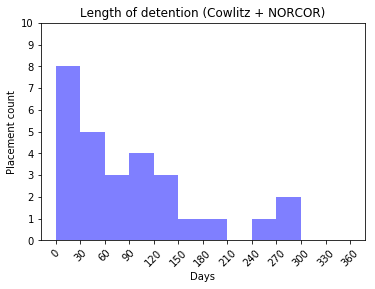

In [110]:
num_bins = np.arange(0,365,30)
data = df['Days']
# the histogram of the data
n, bins, patches = plt.hist(data, num_bins, facecolor='blue', alpha=0.5)
 
plt.plot()
plt.xlabel('Days')
plt.xticks(np.arange(0, 365, step=30), rotation=45)
plt.ylabel('Placement count')
plt.yticks(np.arange(0, 11, step=1))
plt.ylim(0, 10)
plt.title('Length of detention (Cowlitz + NORCOR)')
 
# Tweak spacing to prevent clipping of ylabel
plt.subplots_adjust(left=0.15) 
# plt.savefig('output/nwdc_solitary_length_hist.png', bbox_inches='tight')
plt.show()

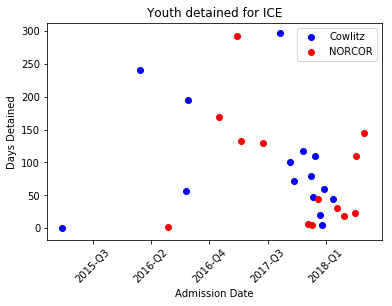

In [144]:
x=cow.dropna(subset=['Days']).loc[:, 'Admitted'].astype(int)
y=cow.dropna(subset=['Days']).loc[:, 'Days']

fig = plt.figure()
ax = fig.add_subplot(111)
plot1 = plt.scatter(x, y, color='b')
plot1.set_label('Cowlitz')

x=nor.dropna(subset=['Days']).loc[:, 'Admitted'].astype(int)
y=nor.dropna(subset=['Days']).loc[:, 'Days']
plot2 = plt.scatter(x, y, color='r')
plot2.set_label('NORCOR')


xticks = ax.get_xticks()
xticks_dates = [str(f'{pd.to_datetime(x).year}-Q{pd.to_datetime(x).quarter}') for x in xticks]
ax.set_xticklabels(xticks_dates,  rotation=45)
plt.ylabel('Days Detained')
plt.xlabel('Admission Date')
plt.legend()
plt.title('Youth detained for ICE')
plt.show()
plt.close(fig=fig)
del fig, ax

In [112]:
df['Days'].max()

297.0

In [113]:
df_filled = df.copy()
df_filled['Released'] = df_filled['Released'].fillna(pd.to_datetime('2019-1-31'))

In [114]:
df_filled

,ID,Days,Hours,Facility,Admitted,Released,Nationality,Criminal Charges
0,Cowlitz 1,0.0,11.0,Cowlitz,2015-04-21,2015-04-21,NaN,NaN
1,Cowlitz 2,101.0,15.0,Cowlitz,2017-10-10,2018-01-19,NaN,NaN
2,Cowlitz 3,79.0,10.0,Cowlitz,2018-01-02,2018-03-22,NaN,NaN
3,Cowlitz 4,4.0,20.0,Cowlitz,2018-02-15,2018-02-19,NaN,NaN
4,Cowlitz 5,195.0,14.0,Cowlitz,2016-08-30,2017-03-13,NaN,NaN
5,Cowlitz 6,118.0,11.0,Cowlitz,2017-11-30,2018-03-28,NaN,NaN
6,Cowlitz 7,20.0,1.0,Cowlitz,2018-02-08,2018-02-28,NaN,NaN
7,Cowlitz 8,56.0,9.0,Cowlitz,2016-08-25,2016-10-20,NaN,NaN
8,Cowlitz 9,47.0,3.0,Cowlitz,2018-01-12,2018-02-28,NaN,NaN
9,Cowlitz 10,241.0,20.0,Cowlitz,2016-02-23,2016-10-21,NaN,NaN


In [121]:
df_filled.sort_values(by='Admitted', inplace=True)

In [122]:
df_filled.reset_index(drop=True, inplace=True)

In [124]:
cow_filled = df_filled[df_filled['Facility'] == 'Cowitz']
nor_filled = df_filled[df_filled['Facility'] == 'NORCOR']

Text(0.5, 1.0, 'Detention timeline')

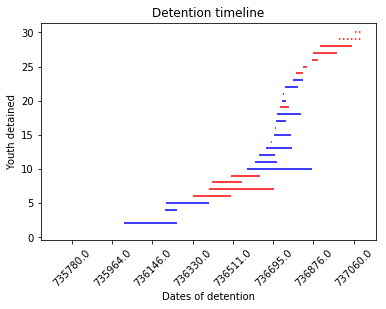

In [198]:
colors = df_filled['Facility'].replace({'Cowlitz': 'b', 'NORCOR': 'r'})
fig = plt.figure()
ax = fig.add_subplot(111)
ax.xaxis_date()
fig = plt.hlines(df_filled.index+1,
                mdates.date2num(df_filled['Admitted']),
                mdates.date2num(df_filled['Released']),
                color = colors,
                linestyles = lines)
ax.set_xticklabels(ax.get_xticks(), rotation=45)
plt.ylabel('Youth detained')
plt.xlabel('Dates of detention')
plt.title('Detention timeline')

In [116]:
pd.to_datetime('2019-01-31')

Timestamp('2019-01-31 00:00:00')

In [161]:
lines = ['solid'] * 30

In [164]:
lines[-1] = 'dotted'

In [166]:
lines[-2] = 'dotted'

In [212]:
quarterly = df_filled.set_index('Admitted').groupby(['Facility', pd.Grouper(freq='Q')])['ID'].count()
yearly = df_filled.set_index('Admitted').groupby(['Facility', pd.Grouper(freq='AS-OCT')])['ID'].count()

In [213]:
quarterly

Facility  Admitted  
Cowlitz   2015-06-30    1
          2016-03-31    1
          2016-09-30    2
          2017-09-30    1
          2017-12-31    3
          2018-03-31    7
NORCOR    2016-06-30    1
          2017-03-31    3
          2017-06-30    1
          2017-12-31    1
          2018-03-31    2
          2018-06-30    4
          2018-09-30    1
          2018-12-31    1
          2019-03-31    1
Name: ID, dtype: int64

In [231]:
data = yearly.T.unstack()

In [236]:
data.columns = data.columns.year

In [239]:
data.columns

Int64Index([2014, 2015, 2016, 2017, 2018], dtype='int64', name='Admitted')

Text(0.5, 1.0, 'Youth detained for ICE')

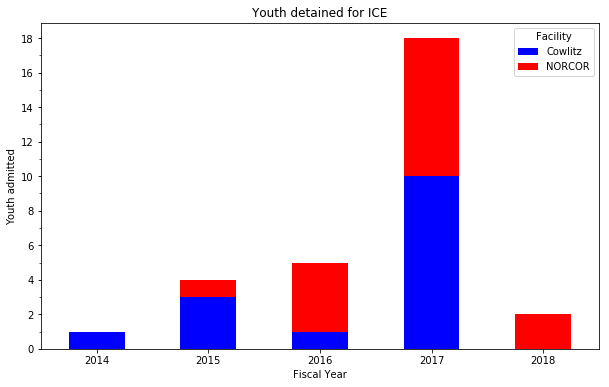

In [267]:
fig, ax = plt.subplots(figsize=(10,6))
fig = data.T.plot(kind='bar', ax=ax, stacked=True, color=['b', 'r'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=-0)
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(2))
plt.xlabel('Fiscal Year')
plt.ylabel('Youth admitted')
plt.title('Youth detained for ICE')

In [268]:
df['Days'].sum()

2549.0